# Data Management with Python - a glimpse

This notebook demonstrates how to use Python to perform the same data management operations as the one performed with OpenRefine in the following Data Carpentry workshop: https://datacarpentry.org/openrefine-socialsci/

In [1]:
import pandas as pd

# Loading data
data = pd.read_csv('https://ndownloader.figshare.com/files/11502815')

In [2]:
# Preview of data (by default the first 5 rows)

data.head()

,interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
0,17-Nov-16,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,no,...,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,17-Nov-16,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,yes,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,17-Nov-16,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,no,...,['solar_torch'],NaN,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,17-Nov-16,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,no,...,['bicycle' ; 'radio' ; 'cow_plough' ; 'sola...,NaN,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,17-Nov-16,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,no,...,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mo...,NaN,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


In [3]:
# Counts of unique values ("faceting" in Open Refine)

data['village'].value_counts() # Sorted by count by default

Ruaca                43
God                  43
Chirodzo             37
Ruaca-Nhamuenda       3
Ruca                  2
Chirdozo              1
49                    1
Ruaca - Nhamuenda     1
Name: village, dtype: int64

In [4]:
data['village'].value_counts(sort = False) # Sorted by name

Ruaca - Nhamuenda     1
Ruaca-Nhamuenda       3
Chirodzo             37
49                    1
Chirdozo              1
Ruca                  2
God                  43
Ruaca                43
Name: village, dtype: int64

In [5]:
# Correcting errors manually

ruaca_alias = ['Ruaca-Nhamuenda', 'Ruca', 'Ruaca - Nhamuenda', 'Ruaca']
chirodzo_alias = ['Chirodzo', 'Chirdozo']

data.loc[data['village'].isin(ruaca_alias), 'village'] = 'Ruaca'
data.loc[data['village'].isin(chirodzo_alias), 'village'] = 'Chirodzo'

data['village'].value_counts()

Ruaca       49
God         43
Chirodzo    38
49           1
Name: village, dtype: int64

In [6]:
# Convert to datetime

data['interview_date'] = data['interview_date'].astype('datetime64')

In [7]:
# Extracting date information

data['interview_month'] = pd.DatetimeIndex(data['interview_date']).month
data.loc[:, ['interview_date', 'interview_month']].head(10)

,interview_date,interview_month
0,2016-11-17,11
1,2016-11-17,11
2,2016-11-17,11
3,2016-11-17,11
4,2016-11-17,11
5,2016-11-17,11
6,2016-11-17,11
7,2016-11-16,11
8,2016-11-16,11
9,2016-12-16,12


In [8]:
# Converting to list
punct_remove = ["[", "]", "'", " "]

for punct in punct_remove:
    data['items_owned'] = data['items_owned'].str.replace(punct, "")
   
data['items_owned'] = data['items_owned'].str.split(";")

data['items_owned'].head()

0            [bicycle, television, solar_panel, table]
1    [cow_cart, bicycle, radio, cow_plough, solar_p...
2                                        [solar_torch]
3    [bicycle, radio, cow_plough, solar_panel, mobi...
4         [motorcyle, radio, cow_plough, mobile_phone]
Name: items_owned, dtype: object

In [9]:
# Counting values
import itertools
from collections import Counter

items_owned = list(itertools.chain.from_iterable(data['items_owned'].dropna().values))
Counter(items_owned)

Counter({'bicycle': 60,
         'television': 31,
         'solar_panel': 65,
         'table': 45,
         'cow_cart': 30,
         'radio': 86,
         'cow_plough': 85,
         'solar_torch': 52,
         'mobile_phone': 86,
         'motorcyle': 39,
         'fridge': 5,
         'electricity': 6,
         'sofa_set': 9,
         'lorry': 5,
         'sterio': 12,
         'computer': 2,
         'car': 3})

In [10]:
# Counting values (using pandas)

data.explode(column = 'items_owned')['items_owned'].value_counts()

mobile_phone    86
radio           86
cow_plough      85
solar_panel     65
bicycle         60
solar_torch     52
table           45
motorcyle       39
television      31
cow_cart        30
sterio          12
sofa_set         9
electricity      6
lorry            5
fridge           5
car              3
computer         2
Name: items_owned, dtype: int64

In [11]:
# Filtering values - text match
data_mabat = data.loc[data['respondent_roof_type'].str.contains('mabat'), :]
                      
data_mabat['respondent_roof_type'].value_counts()

mabatisloping    48
mabatipitched    10
Name: respondent_roof_type, dtype: int64

In [12]:
# Filtering values - specific values
keep_rooftypes = ['mabatipitched', 'mabatisloping']

data_mabat2 = data.loc[data['respondent_roof_type'].isin(keep_rooftypes), :]
data_mabat2['respondent_roof_type'].value_counts()

mabatisloping    48
mabatipitched    10
Name: respondent_roof_type, dtype: int64

In [13]:
# Filtering values - specific values, inverted
data_mabat3 = data.loc[~data['respondent_roof_type'].isin(keep_rooftypes), :]
data_mabat3['respondent_roof_type'].value_counts()

grass    73
Name: respondent_roof_type, dtype: int64

In [14]:
# Sorting values

data.sort_values(by = ['gps_Altitude']).head()

,interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID,interview_month
110,2017-05-11,108,2017-05-11T05:42:08.000Z,2017-05-11T06:08:58.000Z,Manica,Manica,Bandula,God,22,no,...,NaN,3,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['rely_less_food' ; 'limit_portion' ; 'reduc...,-19.111469,33.476105,0,20.000,uuid:e4f4d6ba-e698-45a5-947f-ba6da88cc22b,5
120,2017-06-03,167,2017-06-03T06:25:09.000Z,2017-06-03T06:45:06.000Z,Manica,Manica,Bandula,Ruaca,16,no,...,NaN,2,['Jan' ; 'Nov' ; 'Dec'],['lab_ex_food'],-19.114989,33.488268,0,2000.000,uuid:a9d1a013-043b-475d-a71b-77ed80abe970,6
119,2017-06-03,166,2017-06-03T05:53:28.000Z,2017-06-03T06:25:06.000Z,Manica,Manica,Bandula,Ruaca,16,no,...,NaN,2,['Feb' ; 'Mar'],['go_forest' ; 'lab_ex_food'],-19.113859,33.482665,0,1799.999,uuid:40aac732-94df-496c-97ba-5b67f59bcc7a,6
114,2017-05-18,143,2017-05-18T05:55:04.000Z,2017-05-18T06:37:10.000Z,Manica,Manica,Bandula,Ruaca,24,yes,...,NaN,3,['Jan' ; 'Dec'],['rely_less_food' ; 'limit_variety'],-19.112485,33.476332,0,1911.000,uuid:9a096a12-b335-468c-b3cc-1191180d62de,5
112,2017-05-11,117,2017-05-11T06:28:02.000Z,2017-05-11T06:55:35.000Z,Manica,Manica,Bandula,Ruaca,1,no,...,NaN,3,['Jan' ; 'Feb' ; 'Nov' ; 'Dec'],['rely_less_food' ; 'limit_variety' ; 'reduc...,-19.111469,33.476105,0,20.000,uuid:3fe626b3-c794-48e1-a80f-5bfe440c507b,5


In [15]:
# Sorting values - multiple

data.sort_values(by = ['gps_Latitude', 'gps_Longitude']).head()

,interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID,interview_month
120,2017-06-03,167,2017-06-03T06:25:09.000Z,2017-06-03T06:45:06.000Z,Manica,Manica,Bandula,Ruaca,16,no,...,NaN,2,['Jan' ; 'Nov' ; 'Dec'],['lab_ex_food'],-19.114989,33.488268,0,2000.000,uuid:a9d1a013-043b-475d-a71b-77ed80abe970,6
119,2017-06-03,166,2017-06-03T05:53:28.000Z,2017-06-03T06:25:06.000Z,Manica,Manica,Bandula,Ruaca,16,no,...,NaN,2,['Feb' ; 'Mar'],['go_forest' ; 'lab_ex_food'],-19.113859,33.482665,0,1799.999,uuid:40aac732-94df-496c-97ba-5b67f59bcc7a,6
114,2017-05-18,143,2017-05-18T05:55:04.000Z,2017-05-18T06:37:10.000Z,Manica,Manica,Bandula,Ruaca,24,yes,...,NaN,3,['Jan' ; 'Dec'],['rely_less_food' ; 'limit_variety'],-19.112485,33.476332,0,1911.000,uuid:9a096a12-b335-468c-b3cc-1191180d62de,5
1,2016-11-17,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,yes,...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.000,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,11
12,2016-11-21,13,2017-04-03T03:58:43.000Z,2017-04-03T04:19:36.000Z,Manica,Manica,Bandula,God,7,yes,...,NaN,2,['Sept' ; 'Oct' ; 'Nov'],['lab_ex_food'],-19.112369,33.483556,706,15.000,uuid:6c00c145-ee3b-409c-8c02-2c8d743b6918,11


In [16]:
# Convert numerical to string (text)

data['years_farm'] = data['years_farm'].astype('string')

data['years_farm'].head()

0    11
1     2
2    40
3     6
4    18
Name: years_farm, dtype: string

In [17]:
# Convert string to numerical

data['years_farm'] = data['years_farm'].astype('float')

data['years_farm'].head()

0    11.0
1     2.0
2    40.0
3     6.0
4    18.0
Name: years_farm, dtype: float64

<AxesSubplot:ylabel='Frequency'>

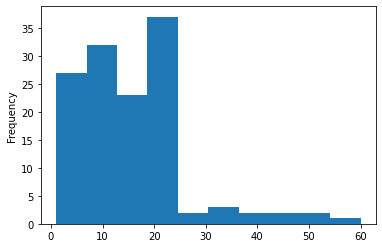

In [18]:
# Exploring numberical data (with a histogram)
from matplotlib import pyplot as plt
% matplotlib inline

data['years_farm'].plot.hist()

In [19]:
# Save data

data.to_csv('../data/SAFI_edit.csv', index = False)